# Introdução

Exemplo de classificação utilizando Árvore de Decisão.

Vamos utilizar o clássico conjunto de dados "Iris", que contém informações sobre 150 flores, divididas em três espécies diferentes: Iris setosa, Iris versicolor e Iris virginica. Cada flor tem quatro características medidas em centímetros: comprimento da sépala, largura da sépala, comprimento da pétala e largura da pétala.

O objetivo desse exemplo é classificar a espécie de cada flor. Como atributos preditores, vamos usar somente o comprimento e a largura da sépala, para facilitar a visualização das fronteiras de decisão.

In [ ]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib.colors import ListedColormap

In [ ]:
# Carregando os dados
iris = datasets.load_iris(as_frame=True)
iris.frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Nome das espécies
especie = iris.target_names
print(especie)

['setosa' 'versicolor' 'virginica']


# Análise exploratória

In [ ]:
# Qual é o volume de dados?
iris.frame.shape

(150, 5)

In [ ]:
# Há dados faltantes?
iris.frame.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [ ]:
# Há uma distribuição uniforme de dados para as categorias (espécies)?
iris.target.value_counts()

,count
target,
0,50
1,50
2,50


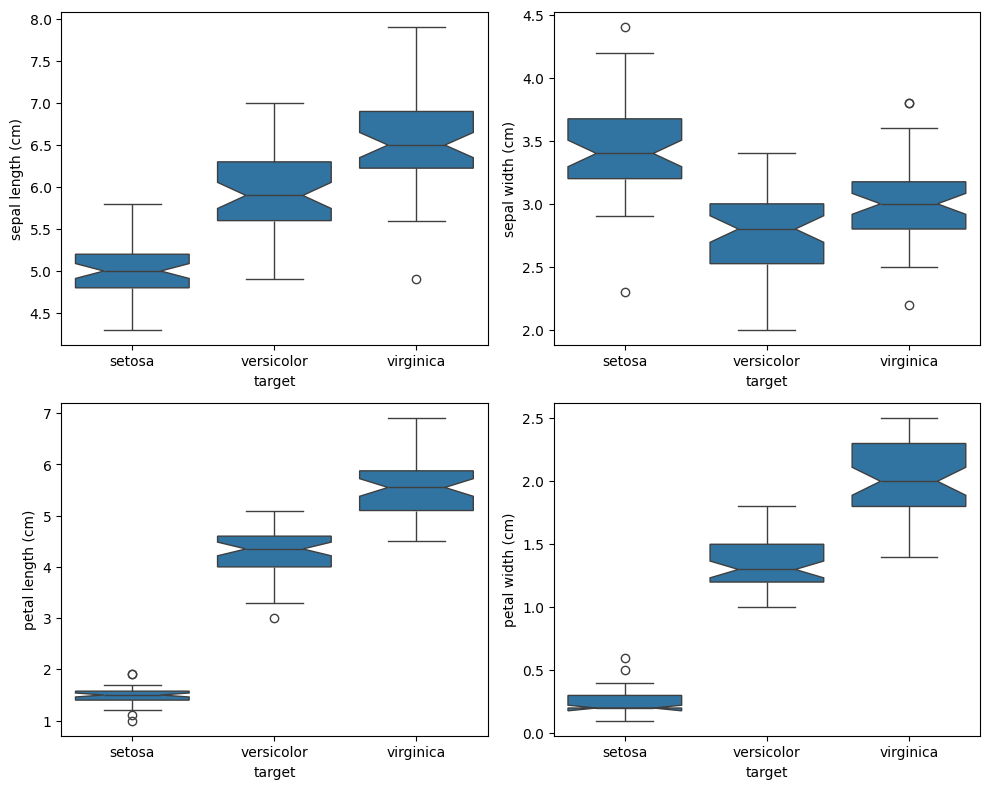

In [ ]:
# Distribuição dos atributos para as diferentes espécies
import seaborn as sns
especie = iris.target_names
atributos = iris.feature_names
df_iris = pd.concat([iris.data, pd.Series(iris.target, name='target')], axis=1)
fig, axes = plt.subplots(2,2, figsize=(10, 8))
for name, ax in zip(atributos, axes.flatten()):
    sns.boxplot(y=name, x='target', data=df_iris, notch=True, ax=ax)
    ax.set_xticks(range(len(especie))) # Set the tick locations
    ax.set_xticklabels(especie) # Set the species names as x-axis labels
plt.tight_layout()
plt.show()

# Preparação dos dados

In [ ]:
# Separação de variáveis preditoras e alvo
# utilizando somente o comprimento e a largura da sépala
X = iris.data[['sepal length (cm)', 'sepal width (cm)']]
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Árvore de Decisão

In [ ]:
# Árvore de decisão sem poda
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
print("Acurácia treino:", clf.score(X_train, y_train))
print("Acurácia teste:", clf.score(X_test, y_test))

Acurácia treino: 0.9428571428571428
Acurácia teste: 0.6444444444444445


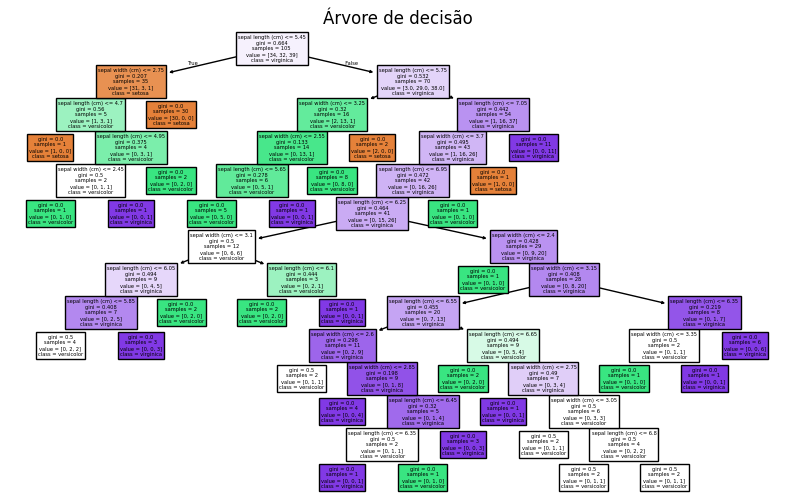

In [ ]:
# Plotar a árvore completa
especie = iris.target_names
nomes = iris.feature_names
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=nomes, class_names=especie, filled=True)
plt.title("Árvore de decisão")
plt.show()

In [ ]:
# Função para plotar a superfície de decisão

def plot_decision_boundary(clf, X, y, title):
    # Convert X to a NumPy array if it's a pandas DataFrame
    if isinstance(X, pd.DataFrame):
        X = X.values

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
    cmap_bold = ["red", "green", "blue"]

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    for i, color in enumerate(cmap_bold):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], edgecolor="k")
    plt.xlabel(nomes[0])
    plt.ylabel(nomes[1])
    plt.title(title)
    plt.legend()
    plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


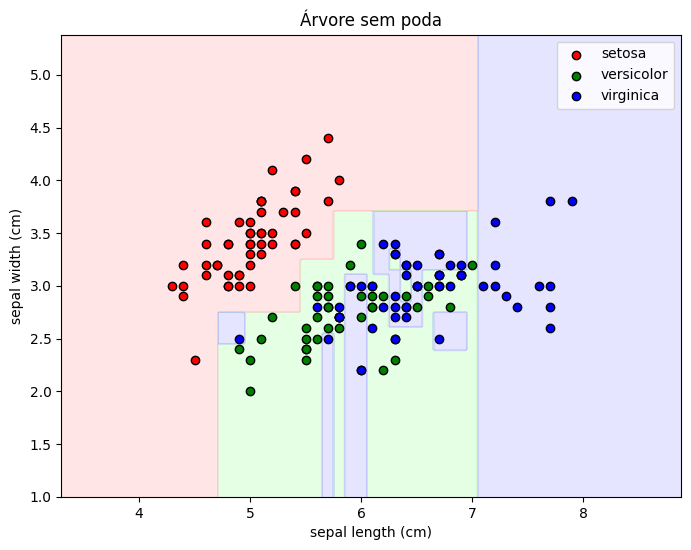

In [ ]:
# Plotando a superfície de decisão para a árvore sem poda
plot_decision_boundary(clf, X, y, "Árvore sem poda")

# Podando a árvore

*Exercício: testar outros tipos de poda, alterando hiperparâmetros como: min_samples_leaf, min_samples_split*

In [ ]:
# Limitando as camadas da árvore (max_depth)
clf_pruned = DecisionTreeClassifier(max_depth=3, random_state=0)
clf_pruned.fit(X_train, y_train)
print("Acurácia treino:", clf.score(X_train, y_train))
print("Acurácia teste:", clf.score(X_test, y_test))

Acurácia treino: 0.9428571428571428
Acurácia teste: 0.6444444444444445


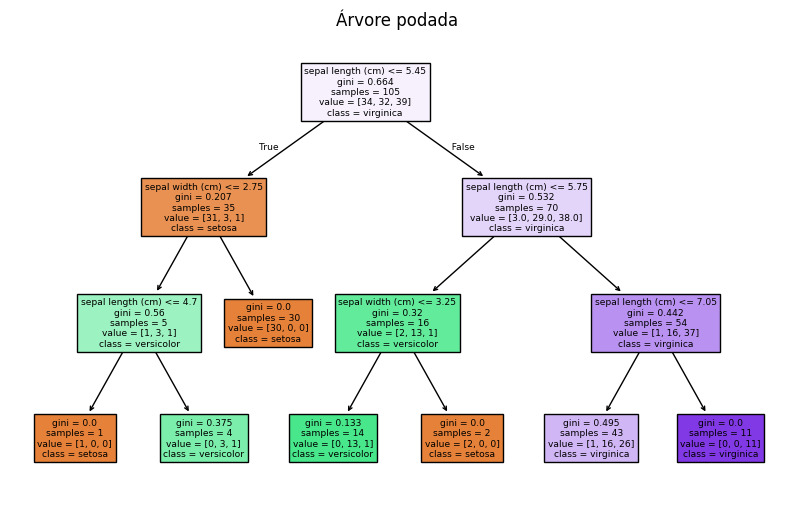

In [ ]:
# Plotar a árvore podada
plt.figure(figsize=(10, 6))
plot_tree(clf_pruned, feature_names=nomes, class_names=especie, filled=True)
plt.title("Árvore podada")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


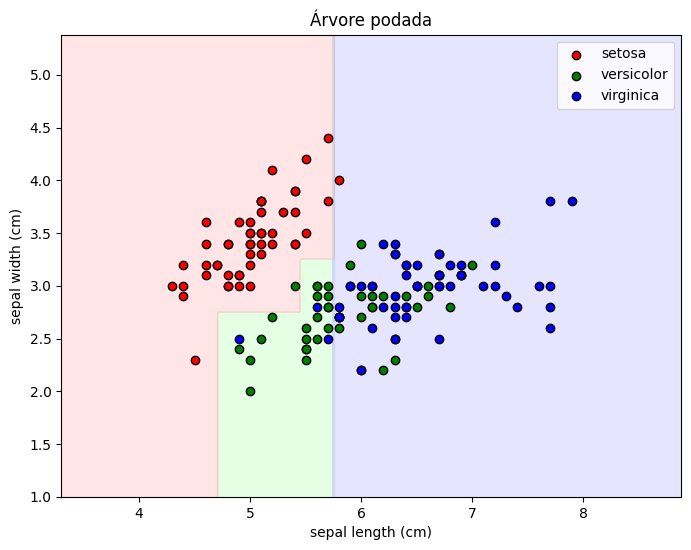

In [ ]:
# Plotando a superfície de decisão para a árvore podada
plot_decision_boundary(clf_pruned, X, y, "Árvore podada")

# Árvore otimizada

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV

# Definindo o espaço de busca de hiperparâmetros
param_grid = {
    "max_depth": [2, 3, 4, 5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

# Configurando o grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0),
                           param_grid,
                           cv=5,
                           scoring="accuracy")

# Aplicando o grid search no conjunto de treino
grid_search.fit(X_train, y_train)

print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Maior acurácia durante a validação cruzada:", grid_search.best_score_)
print("Acurácia do conjunto de teste:", grid_search.score(X_test, y_test))

Melhores hiperparâmetros: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
Maior acurácia durante a validação cruzada: 0.780952380952381
Acurácia do conjunto de teste: 0.6666666666666666


*Exercício: Plotar a árvore otimizada e sua superfície de decisão*

*Exercício: Construir um modelo de árvore de decisão considerando os 4 atributos disponíveis no conjunto de dados iris. Avaliar as diferenças entre os modelos.*